In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

In [101]:
train_df = pd.read_csv('/test.csv')
test_df = pd.read_csv('/train.csv')


In [102]:
test_df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,0.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,glass,500ml,0.96,13280.0
1,1.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,plastic,1.5lt,2.86,6727.0
2,2.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,kinder-cola,can,330ml,0.87,9848.0
3,3.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,glass,500ml,1.00,20050.0
4,4.0,31/01/12,Athens,37.97945,23.71622,672130.0,shop_1,adult-cola,can,330ml,0.39,25696.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
train_df

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
0,6480,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,7056
1,6481,31/01/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,12490
2,6482,31/01/18,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,26640
3,6483,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,41892
4,6484,31/01/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,22923
...,...,...,...,...,...,...,...,...,...,...,...,...
1075,7555,31/12/18,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,2.52,13760
1076,7556,31/12/18,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,2.18,16309
1077,7557,31/12/18,Patra,38.24444,21.73444,168034,shop_6,kinder-cola,can,330ml,0.85,24378
1078,7558,31/12/18,Thessaloniki,40.64361,22.93086,354290,shop_4,adult-cola,plastic,1.5lt,2.17,20691


In [104]:
train_df.dtypes

id             int64
date          object
city          object
lat          float64
long         float64
pop            int64
shop          object
brand         object
container     object
capacity      object
price        float64
quantity       int64
dtype: object

In [105]:
test_df.dtypes

id           float64
date          object
city          object
lat          float64
long         float64
pop          float64
shop          object
brand         object
container     object
capacity      object
price        float64
quantity     float64
dtype: object

In [106]:
test_df = test_df[np.isfinite(test_df['id'])]
test_df['id'] = test_df['id'].astype(int)


In [107]:
train_df.dropna(subset=['quantity'], inplace=True)

train_df['date'] = pd.to_datetime(train_df['date'], format="%d/%m/%y")
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
# train_df['day_of_week_name'] = train_df['date'].dt.day_name()
train_df['day_of_week'] = train_df['date'].dt.dayofweek
# train_df['is_weekend_name'] = train_df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
train_df['is_weekend'] = train_df['day_of_week'].isin([5, 6]).astype(int)

train_df = train_df.astype({'quantity': int, 'pop': int, 'id': int})
train_df.drop('id', axis=1, inplace=True)

train_df['city_num'] = train_df['city'].astype('category').cat.codes
train_df['shop_num'] = train_df['shop'].astype('category').cat.codes
train_df['brand_num'] = train_df['brand'].astype('category').cat.codes
train_df['container_num'] = train_df['container'].astype('category').cat.codes
train_df['capacity_num'] = train_df['capacity'].astype('category').cat.codes

train_df['lag_1'] = train_df['quantity'].shift(1)
train_df['lag_2'] = train_df['quantity'].shift(2)

train_df['rolling_mean_3'] = train_df['quantity'].rolling(window=3).mean()
train_df['rolling_var_3'] = train_df['quantity'].rolling(window=3).var()

train_df['diff_1'] = train_df['quantity'].diff()
train_df['seasonal_diff_12'] = train_df['quantity'].diff(12)
train_df['seasonal_diff_90'] = train_df['quantity'].diff(90)

train_df['rate_of_change'] = train_df['quantity'].diff() / train_df['quantity'].shift()
train_df['cumulative_sum'] = train_df['quantity'].cumsum()

train_df['ewm_mean'] = train_df['quantity'].ewm(span=12).mean()
train_df['ewm_std'] = train_df['quantity'].ewm(span=12).std()





In [108]:
train_df.dtypes

date                datetime64[ns]
city                        object
lat                        float64
long                       float64
pop                          int64
shop                        object
brand                       object
container                   object
capacity                    object
price                      float64
quantity                     int64
year                         int64
month                        int64
day_of_week                  int64
is_weekend                   int64
city_num                      int8
shop_num                      int8
brand_num                     int8
container_num                 int8
capacity_num                  int8
lag_1                      float64
lag_2                      float64
rolling_mean_3             float64
rolling_var_3              float64
diff_1                     float64
seasonal_diff_12           float64
seasonal_diff_90           float64
rate_of_change             float64
cumulative_sum      

In [109]:
test_df['date'] = pd.to_datetime(test_df['date'], format="%d/%m/%y")
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day_of_week'] = test_df['date'].dt.dayofweek
test_df['is_weekend'] = test_df['day_of_week'].isin([5, 6]).astype(int)

test_df = test_df.astype({'quantity': int, 'pop': int, 'id': int})
test_df.drop('id', axis=1, inplace=True)

test_df['city_num'] = test_df['city'].astype('category').cat.codes
test_df['shop_num'] = test_df['shop'].astype('category').cat.codes
test_df['brand_num'] = test_df['brand'].astype('category').cat.codes
test_df['container_num'] = test_df['container'].astype('category').cat.codes
test_df['capacity_num'] = test_df['capacity'].astype('category').cat.codes

test_df['lag_1'] = test_df['quantity'].shift(1)
test_df['lag_2'] = test_df['quantity'].shift(2)

test_df['rolling_mean_3'] = test_df['quantity'].rolling(window=3).mean()
test_df['rolling_var_3'] = test_df['quantity'].rolling(window=3).var()

test_df['diff_1'] = test_df['quantity'].diff()
test_df['seasonal_diff_12'] = test_df['quantity'].diff(12)
test_df['seasonal_diff_90'] = test_df['quantity'].diff(90)

test_df['rate_of_change'] = test_df['quantity'].diff() / test_df['quantity'].shift()
test_df['cumulative_sum'] = test_df['quantity'].cumsum()

test_df['ewm_mean'] = test_df['quantity'].ewm(span=12).mean()
test_df['ewm_std'] = test_df['quantity'].ewm(span=12).std()

train_df.head(20)

,date,city,lat,long,pop,shop,brand,container,capacity,price,...,lag_2,rolling_mean_3,rolling_var_3,diff_1,seasonal_diff_12,seasonal_diff_90,rate_of_change,cumulative_sum,ewm_mean,ewm_std
0,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,plastic,1.5lt,3.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7056,7056.000000,NaN
1,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,kinder-cola,can,330ml,0.85,...,NaN,NaN,NaN,5434.0,NaN,NaN,0.770125,19546,9999.416667,3842.418249
2,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,adult-cola,glass,500ml,0.83,...,7056.0,15395.333333,1.022140e+08,14150.0,NaN,NaN,1.132906,46186,16494.240185,10321.380788
3,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,orange-power,glass,500ml,0.54,...,12490.0,27007.333333,2.162206e+08,15252.0,NaN,NaN,0.572523,88078,24511.320402,15902.986635
4,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,orange-power,plastic,1.5lt,0.83,...,26640.0,30485.000000,1.010438e+08,-18969.0,NaN,NaN,-0.452807,111001,24079.779426,13179.736888
5,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,gazoza,glass,500ml,0.77,...,41892.0,29704.000000,1.118825e+08,1374.0,NaN,NaN,0.059940,135298,24132.575453,11248.150816
6,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,gazoza,plastic,1.5lt,1.22,...,22923.0,22838.333333,2.258377e+06,-3002.0,NaN,NaN,-0.123554,156593,23499.380419,9870.571951
7,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,gazoza,can,330ml,0.28,...,24297.0,27899.666667,8.039524e+07,16812.0,NaN,NaN,0.789481,194700,26547.765477,10807.021902
8,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,lemon-boost,glass,500ml,0.95,...,21295.0,24921.666667,1.391869e+08,-22744.0,NaN,NaN,-0.596846,210063,24335.020766,10736.123561
9,2018-01-31,Athens,37.97945,23.71622,664046,shop_1,lemon-boost,plastic,1.5lt,2.66,...,38107.0,20740.666667,2.371185e+08,-6611.0,NaN,NaN,-0.430320,218815,21382.044387,11616.261692


In [110]:
X_train_simple = train_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
X_train = train_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                    'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_train = train_df['quantity']

X_test_simple = test_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month']]
X_test = test_df[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                  'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test = test_df['quantity']

In [111]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error, mean_poisson_deviance, mean_gamma_deviance
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")

In [112]:
models=[("Linear Regression", LinearRegression()),
        ("Ridge Regression", Ridge()),
        ("Lasso Regression", Lasso()),
        ("Elastic-Net Regression", ElasticNet()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("Extra Trees", ExtraTreesRegressor()),
        ("Gradient Boosting", GradientBoostingRegressor()),
        ("Ada Boost", AdaBoostRegressor()),
        ("XGBRegressor", XGBRegressor()),
        ("LGBMRegressor", LGBMRegressor(verbose=-1)),
        ("CatBoostRegressor", CatBoostRegressor(silent=True)),
        ("KNeighbors", KNeighborsRegressor())]

for name, model in models:
    results = cross_val_score(model, X_train_simple, y_train, cv=10, scoring='r2')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[93m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

Linear Regression: 0.1308 ± 0.2695
Ridge Regression: 0.1310 ± 0.2692
Lasso Regression: 0.1308 ± 0.2694
Elastic-Net Regression: 0.0630 ± 0.2600
Decision Tree: 0.5241 ± 0.1456
Random Forest: 0.7645 ± 0.1148
Extra Trees: 0.7536 ± 0.1375
Gradient Boosting: 0.8265 ± 0.0599
Ada Boost: 0.4155 ± 0.3424
XGBRegressor: 0.8100 ± 0.1022
LGBMRegressor: 0.8418 ± 0.0564
CatBoostRegressor: 0.8782 ± 0.0504
KNeighbors: 0.4247 ± 0.0704


In [113]:
# model = CatBoostRegressor(silent=True)

# grid = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],
#     'depth': [4, 6, 10],
#     'l2_leaf_reg': [1, 3, 5, 7, 9]
# }

# grid_search_result = model.grid_search(grid, X=X_train, y=y_train, plot=True)
# print(grid_search_result['params'])

In [114]:
cb_model = CatBoostRegressor(depth=6, l2_leaf_reg=5, learning_rate=0.05, silent=True).fit(X_train, y_train)
cb_predict = cb_model.predict(X_test)
# cb_model.get_all_params()

print(f"""Тrain: {cb_model.score(X_train, y_train)}\nТest: {cb_model.score(X_test, y_test)}""")
print("")
print("r2_score: ", r2_score(y_test, cb_predict))
print("mean_absolute_error: ", mean_absolute_error(y_test, cb_predict))
print("mean_squared_error: ", mean_squared_error(y_test, cb_predict))
print("root_mean_squared_error: ", mean_squared_error(y_test, cb_predict, squared=False))
print("max_error: ", max_error(y_test, cb_predict))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test, cb_predict))

Тrain: 0.9997599601157552
Тest: 0.9745586540639505

r2_score:  0.9745586540639505
mean_absolute_error:  1325.9500221439614
mean_squared_error:  8151613.353773444
root_mean_squared_error:  2855.1030373304293
max_error:  45809.85269749881
mean_absolute_percentage_error:  0.04455476217033474


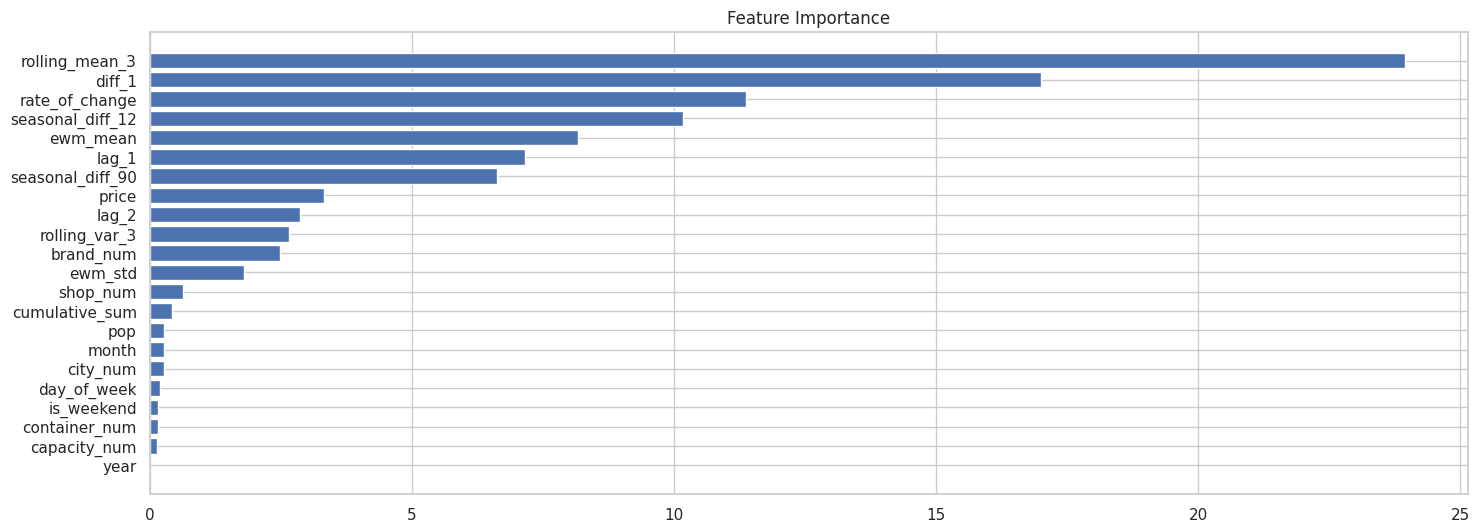

In [115]:
feature_importance = cb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(17, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance');

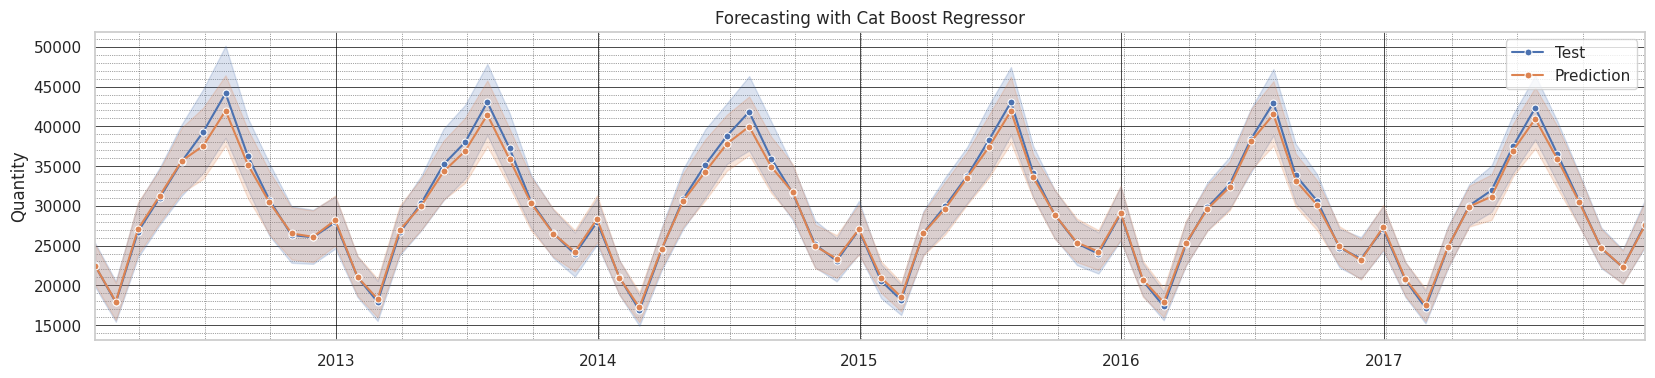

In [116]:
start_date_test = test_df['date'].min()
end_date_test = test_df['date'].max()

f, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=test_df['date'], y=test_df['quantity'], marker='o', markersize=5, label="Test")
sns.lineplot(x=test_df['date'], y=cb_predict, marker='o', markersize=5, label="Prediction")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([start_date_test, end_date_test]);

ax.set(xlabel=None)
ax.set_ylabel("Quantity")
ax.set_title(f"Forecasting with Cat Boost Regressor")
ax.legend();

In [117]:
city_to_plot = 'Athens'
shop_1_to_plot = 'shop_1'
shop_2_to_plot = 'shop_3'
brand_to_plot = 'gazoza'
container_to_plot = 'can'

filtered_df_shop_1_test = test_df[(test_df['city'] == city_to_plot) & (test_df['shop'] == shop_1_to_plot) & (test_df['brand'] == brand_to_plot) & (test_df['container'] == container_to_plot)]

X_test_shop_1 = filtered_df_shop_1_test[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                                         'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test_shop_1 = filtered_df_shop_1_test['quantity']

cb_predict_shop_1 = cb_model.predict(X_test_shop_1)
print("r2_score: ", r2_score(y_test_shop_1, cb_predict_shop_1))
print("mean_absolute_error: ", mean_absolute_error(y_test_shop_1, cb_predict_shop_1))
print("mean_squared_error: ", mean_squared_error(y_test_shop_1, cb_predict_shop_1))
print("root_mean_squared_error: ", mean_squared_error(y_test_shop_1, cb_predict_shop_1, squared=False))
print("max_error: ", max_error(y_test_shop_1, cb_predict_shop_1))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test_shop_1, cb_predict_shop_1))

r2_score:  0.9317967966488715
mean_absolute_error:  2114.561870876629
mean_squared_error:  18045192.84504017
root_mean_squared_error:  4247.96337614158
max_error:  27217.78822952818
mean_absolute_percentage_error:  0.0397277554787647


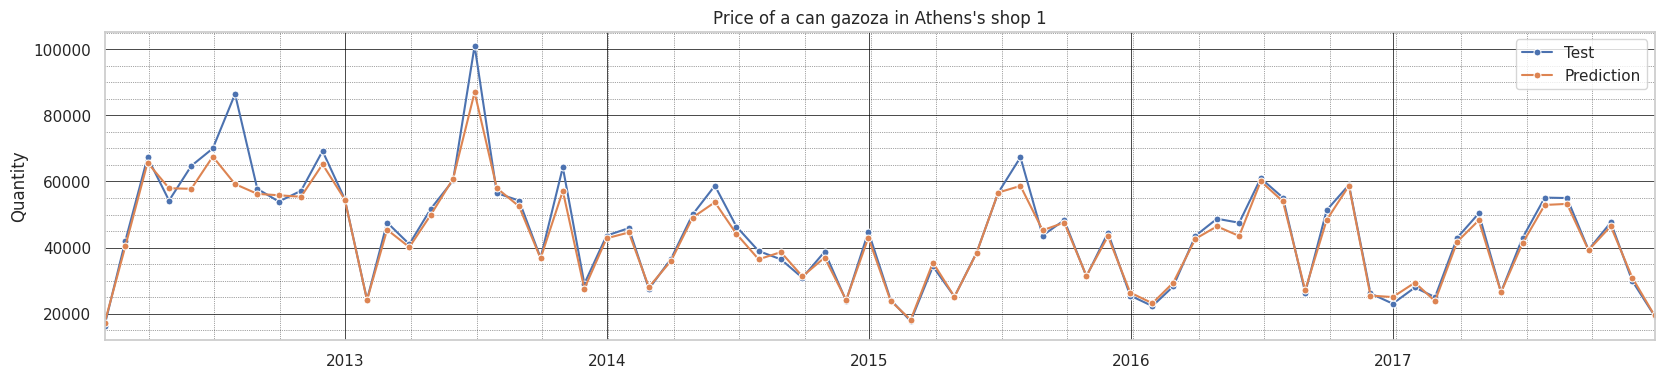

In [118]:
f, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=filtered_df_shop_1_test['date'], y=filtered_df_shop_1_test['quantity'], marker='o', markersize=5, label="Test")
sns.lineplot(x=filtered_df_shop_1_test['date'], y=cb_predict_shop_1, marker='o', markersize=5, label="Prediction")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([start_date_test, end_date_test]);

ax.set(xlabel=None)
ax.set_ylabel("Quantity")
ax.set_title(f"Price of a {container_to_plot} {brand_to_plot} in {city_to_plot}'s shop 1")
ax.legend();

In [119]:
filtered_df_shop_2_test = test_df[(test_df['city'] == city_to_plot) & (test_df['shop'] == shop_2_to_plot) & (test_df['brand'] == brand_to_plot) & (test_df['container'] == container_to_plot)]

X_test_shop_2 = filtered_df_shop_2_test[['city_num', 'pop', 'shop_num', 'brand_num', 'container_num', 'capacity_num', 'price', 'year', 'month', 'day_of_week', 'is_weekend',
                                         'lag_1', 'lag_2', 'rolling_mean_3', 'rolling_var_3', 'diff_1', 'seasonal_diff_12', 'seasonal_diff_90', 'rate_of_change', 'cumulative_sum', 'ewm_mean', 'ewm_std']]
y_test_shop_2 = filtered_df_shop_2_test['quantity']

cb_predict_shop_2 = cb_model.predict(X_test_shop_2)
print("r2_score: ", r2_score(y_test_shop_2, cb_predict_shop_2))
print("mean_absolute_error: ", mean_absolute_error(y_test_shop_2, cb_predict_shop_2))
print("mean_squared_error: ", mean_squared_error(y_test_shop_2, cb_predict_shop_2))
print("root_mean_squared_error: ", mean_squared_error(y_test_shop_2, cb_predict_shop_2, squared=False))
print("max_error: ", max_error(y_test_shop_2, cb_predict_shop_2))
print("mean_absolute_percentage_error: ", mean_absolute_percentage_error(y_test_shop_2, cb_predict_shop_2))


r2_score:  0.9902460052547786
mean_absolute_error:  1066.3060806773728
mean_squared_error:  2299221.4516646564
root_mean_squared_error:  1516.3183873001924
max_error:  4792.019515904663
mean_absolute_percentage_error:  0.030708630241999917


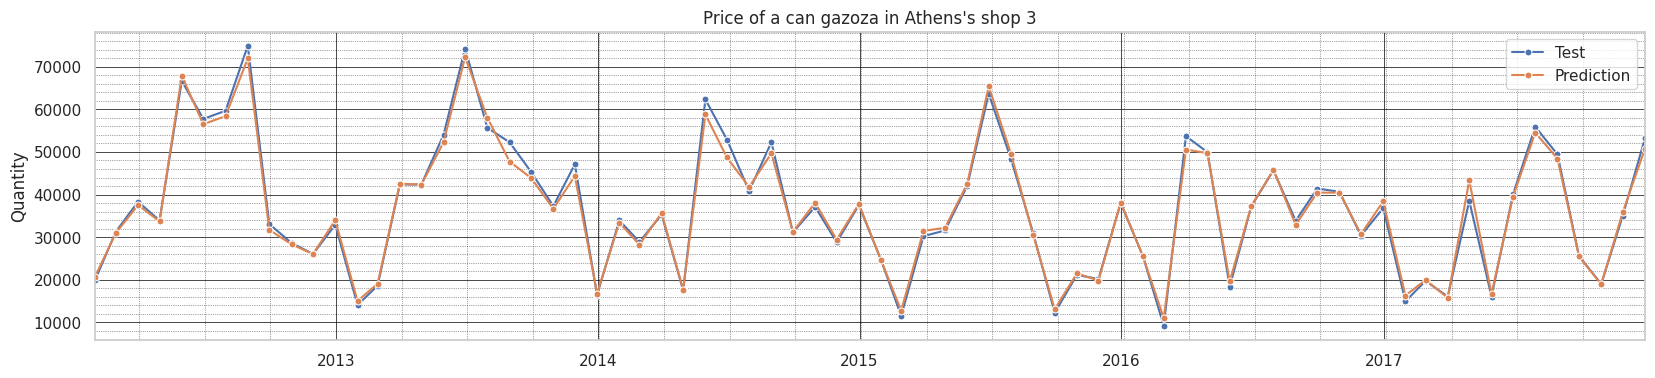

In [120]:
f, ax = plt.subplots(figsize=(20, 4))

sns.lineplot(x=filtered_df_shop_2_test['date'], y=filtered_df_shop_2_test['quantity'], marker='o', markersize=5, label="Test")
sns.lineplot(x=filtered_df_shop_2_test['date'], y=cb_predict_shop_2, marker='o', markersize=5, label="Prediction")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([start_date_test, end_date_test]);

ax.set(xlabel=None)
ax.set_ylabel("Quantity")
ax.set_title(f"Price of a {container_to_plot} {brand_to_plot} in {city_to_plot}'s shop 3")
ax.legend();